In [22]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [24]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
nn=KNeighborsClassifier(n_neighbors=13)
model=nn.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]


In [66]:
diff=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
diff

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


In [67]:
diff.to_csv('diabetes_data.csv')

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[85, 14],
       [21, 34]], dtype=int64)

In [69]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(TP, FN, TN, FP)

34 21 85 14


In [70]:
Model_Accuracy=(TP+TN)/(TP+TN+FN+FP)
print("Accuracy Score:",Model_Accuracy)

Accuracy Score: 0.7727272727272727


In [71]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.7727272727272727

In [72]:
Error_Rate=1-Model_Accuracy
print("Error Rate:", Error_Rate)

Error Rate: 0.2272727272727273


In [73]:
Sensitivity= TP / (TP + FN)
print("Sensitivity:",Sensitivity)

Sensitivity: 0.6181818181818182


In [74]:
Specificity= TN / (TN + FP)
print("Specificity:",Specificity)

Specificity: 0.8585858585858586


In [75]:
from sklearn.metrics import recall_score
print("Sensitivity:",recall_score(y_test,y_pred))
print("Specificity:",recall_score(y_test,y_pred,pos_label=0))

Sensitivity: 0.6181818181818182
Specificity: 0.8585858585858586


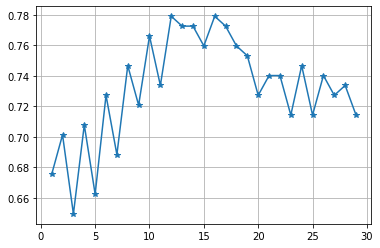

[0.6753246753246753, 0.7012987012987013, 0.6493506493506493, 0.7077922077922078, 0.6623376623376623, 0.7272727272727273, 0.6883116883116883, 0.7467532467532467, 0.7207792207792207, 0.7662337662337663, 0.7337662337662337, 0.7792207792207793, 0.7727272727272727, 0.7727272727272727, 0.7597402597402597, 0.7792207792207793, 0.7727272727272727, 0.7597402597402597, 0.7532467532467533, 0.7272727272727273, 0.7402597402597403, 0.7402597402597403, 0.7142857142857143, 0.7467532467532467, 0.7142857142857143, 0.7402597402597403, 0.7272727272727273, 0.7337662337662337, 0.7142857142857143]


In [76]:
k=[]
for i in range(1,30):
    nn=KNeighborsClassifier(n_neighbors=i)
    model=nn.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    from sklearn.metrics import accuracy_score
    k.append(accuracy_score(y_test,y_pred))
import matplotlib.pyplot as plt
plt.plot(range(1,30),k,marker="*")
plt.grid()
plt.show()
print(k)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
df=pd.read_csv('tshirt.csv')
df

,Height,Wight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [4]:
x = df.iloc[:, 0:2]
y = df.iloc[:,2]

In [14]:
nn = KNeighborsClassifier(n_neighbors=5)

In [15]:
model = nn.fit(x, y)

In [16]:
prediction = model.predict(x)

In [17]:
prediction

array(['M', 'M', 'M', 'M', 'M', 'M', 'L', 'M', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [18]:
diff=pd.DataFrame({'Actual':y,"Predicted":prediction})
diff

,Actual,Predicted
0,M,M
1,M,M
2,M,M
3,M,M
4,M,M
5,M,M
6,M,L
7,L,M
8,L,L
9,L,L


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, prediction)
cm

array([[10,  1],
       [ 1,  6]], dtype=int64)

In [20]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(TN,TP,FN,FP)

10 6 1 1


In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y,prediction))

Accuracy Score:  0.8888888888888888


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
df=pd.read_csv('AptitudeCommunication.csv')
df

,Name,Aptitude,Communication,Class
0,Karuna,2,5.0,Speaker
1,Bhavan,2,6.0,Speaker
2,Gaurav,7,6.0,Leader
3,Parul,7,2.5,Intel
4,Dinesh,8,6.0,Leader
5,Jani,4,7.0,Speaker
6,Bobby,5,3.0,Intel
7,Parimal,3,5.5,Speaker
8,Govind,8,3.0,Intel
9,Sushant,6,5.5,Leader


In [28]:
y=df['Class']
x=df.drop(['Name','Class'],axis=1)
x

,Aptitude,Communication
0,2,5.0
1,2,6.0
2,7,6.0
3,7,2.5
4,8,6.0
5,4,7.0
6,5,3.0
7,3,5.5
8,8,3.0
9,6,5.5


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [41]:
y

0     Speaker
1     Speaker
2      Leader
3       Intel
4      Leader
5     Speaker
6       Intel
7     Speaker
8       Intel
9      Leader
10      Intel
11     Leader
12      Intel
13     Leader
Name: Class, dtype: object

In [42]:
nn = KNeighborsClassifier(n_neighbors=5)

In [43]:
model = nn.fit(x_train, y_train)

In [44]:
prediction = model.predict(x_test)

In [45]:
prediction

array(['Intel', 'Speaker', 'Intel'], dtype=object)

In [46]:
diff=pd.DataFrame({'Actual':y_test,"Predicted":prediction})
diff

,Actual,Predicted
3,Intel,Intel
7,Speaker,Speaker
6,Intel,Intel


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[2, 0],
       [0, 1]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,prediction))

Accuracy Score:  1.0


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [69]:
df.drop('User ID',axis=1,inplace=True)

In [70]:
df["Gender"]=np.where(df["Gender"]=="Male",1,0)
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [71]:
y=df['Purchased']
x=df.drop(['Purchased'],axis=1)
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [72]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
nn = KNeighborsClassifier(n_neighbors=5)

In [75]:
model = nn.fit(x_train, y_train)

In [76]:
prediction = model.predict(x_test)

In [77]:
prediction

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [78]:
diff=pd.DataFrame({'Actual':y_test,"Predicted":prediction})
diff

,Actual,Predicted
209,0,1
280,1,1
33,0,0
210,1,1
93,0,1
...,...,...
246,0,0
227,1,1
369,1,1
176,0,0


In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[46,  6],
       [ 8, 20]], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,prediction))

Accuracy Score:  0.825


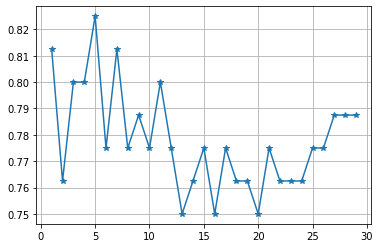

[0.8125, 0.7625, 0.8, 0.8, 0.825, 0.775, 0.8125, 0.775, 0.7875, 0.775, 0.8, 0.775, 0.75, 0.7625, 0.775, 0.75, 0.775, 0.7625, 0.7625, 0.75, 0.775, 0.7625, 0.7625, 0.7625, 0.775, 0.775, 0.7875, 0.7875, 0.7875]


In [81]:
k=[]
for i in range(1,30):
    nn=KNeighborsClassifier(n_neighbors=i)
    model=nn.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    from sklearn.metrics import accuracy_score
    k.append(accuracy_score(y_test,y_pred))
import matplotlib.pyplot as plt
plt.plot(range(1,30),k,marker="*")
plt.grid()
plt.show()
print(k)

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
df=pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [110]:
df["Species"]=np.where(df["Species"]=="Bream",1,0)

In [111]:
y=df['Species']
x=df.drop(['Species'],axis=1)

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [113]:
nn=KNeighborsClassifier(n_neighbors=5)
model=nn.fit(x_train,y_train)
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [114]:
diff=pd.DataFrame({'Actual':y_test,"Predicted":prediction})
diff

,Actual,Predicted
78,0,0
155,0,0
128,0,0
55,0,0
94,0,0
29,1,0
147,0,0
51,0,0
98,0,0
141,0,0


In [115]:
diff["Predicted"]=np.where(diff["Predicted"]==0,"Smelt","Bream")
diff["Actual"]=np.where(diff["Actual"]==0,"Smelt","Bream")
diff

,Actual,Predicted
78,Smelt,Smelt
155,Smelt,Smelt
128,Smelt,Smelt
55,Smelt,Smelt
94,Smelt,Smelt
29,Bream,Smelt
147,Smelt,Smelt
51,Smelt,Smelt
98,Smelt,Smelt
141,Smelt,Smelt


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       1.00      0.60      0.75        10

    accuracy                           0.88        32
   macro avg       0.92      0.80      0.83        32
weighted avg       0.89      0.88      0.86        32



In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
df=pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [93]:
df.drop(['Species'],axis=1,inplace=True)

In [95]:
y=df['Weight']
x=df.drop(['Weight'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [97]:
y_pred=model.predict(x_test)

In [101]:
diff=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
diff

,Actual,Predicted
78,78.0,77.685633
155,13.4,-159.124606
128,200.0,385.167355
55,270.0,300.261194
94,150.0,179.410232
29,1000.0,775.667262
147,7.0,-214.434155
51,180.0,274.909638
98,188.0,268.445110
141,1250.0,1116.011532


In [102]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))

MAE: 103.90941708422304
MSE: 16763.887193140756
R2 score: 0.8821430593048694


In [103]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)
x_poly,x_train

(array([[  1.        ,  15.        ,  16.2       , ...,  21.09013776,
          12.08535984,   6.92531856],
        [  1.        ,  43.2       ,  46.        , ...,  60.715264  ,
          37.94704   ,  23.7169    ],
        [  1.        ,  23.9       ,  26.5       , ..., 153.20993284,
          58.12738658,  22.05335521],
        ...,
        [  1.        ,  29.4       ,  32.        , ..., 223.63407936,
          77.32621152,  26.73717264],
        [  1.        ,  20.5       ,  22.5       , ...,  46.131264  ,
          24.614208  ,  13.133376  ],
        [  1.        ,  25.2       ,  27.3       , ...,  69.272329  ,
          42.7577479 ,  26.39185129]]),
      Length1  Length2  Length3   Height   Width
 75      15.0     16.2     17.2   4.5924  2.6316
 138     43.2     46.0     48.7   7.7920  4.8700
 2       23.9     26.5     31.1  12.3778  4.6961
 86      20.0     22.0     23.5   6.1100  3.4075
 45      20.5     22.5     25.3   7.0334  3.8203
 ..       ...      ...      ...      ...   

In [104]:
model = LinearRegression()
model.fit(x_poly,y_train)
y_pred = model.predict(x_poly)
y_pred

array([ 4.73237822e+01,  6.30424160e+02,  3.29014798e+02,  1.28666132e+02,
        1.59063653e+02,  1.14513238e+02,  1.42729132e+02,  9.09227924e+02,
        7.12375075e+02,  5.94642822e+02,  1.27300961e+01,  1.20393478e+02,
        1.45970794e+02,  7.16848860e+01,  1.11614341e+02,  6.24622488e+02,
        1.34770137e+02,  7.83056709e+01,  7.09275286e+02,  4.71711470e+02,
        5.69511640e+02,  2.00460975e+02,  1.04283231e+03,  7.26040635e+02,
        9.32334972e+00,  9.97767434e+02,  1.14855496e+02,  4.31541572e+02,
        4.76060213e+02,  9.70299126e+02,  9.52410428e+02,  2.55990994e+02,
        1.55847792e+02,  4.93793734e+02,  1.32249471e+02,  3.45777047e+02,
        2.78907373e+02,  6.83732243e+02,  1.06294731e+02,  1.34531500e+02,
        1.13998901e+02,  7.57649640e+02,  1.19892353e+02,  8.64346361e+02,
        6.97058109e+02,  6.97374078e+02,  6.47570872e+02,  9.10234652e+01,
        1.27622204e+02,  1.49530989e+03,  2.35156420e+02,  7.88560838e-03,
        3.72625719e+02,  